# Математическая статистика
## Практическое задание 2

В данном задании рассматриваются различные свойства оценок, методы получения оценок, способы сравнения оценок.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 2"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `2.N.ipynb` и `2.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла
* Задача 2 - 3 балла
* Задача 3 - 3 балла
* Задача 4 - 2 балла
* Задача 5 - 2 балла
* Задача 6 - 3 балла
* Задача 7а - 3 балла
* Задача 7b<font size="5" color="red">\*</font> - 5 баллов
* Задача 8 - 4 балла
* Задача 9<font size="5" color="red">\*</font> - 4 балла
* Задача 10<font size="5" color="red">\*</font> - 5 баллов


При выполнении задания рекомендуется пользоваться библиотекой `scipy.stats`. Подробное описание есть в наших инструкциях.

**Задача 1.** В этой задаче нужно визуализировать свойство несмещенности.

Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Известно, что в качестве оценки параметра $\theta$ можно использовать следующие оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$.

**Вопрос:** Какие из этих оценок являются несмещенными?

**Ответ:** 1. Найдем мат. ожидание $EX_{(n)}$. $X_{(n)}=max\{X_{1}, X_{2},..., X_{n}\}$=max
По определению выборки $X_{i}$ независимы. Поэтому: 

$F_{max}(X)=P($max$\leq X)=P(X_{1}\leq X,..., X_{n}\leq X)=F^n(X)=\frac{X^n}{\theta^n}$ 

$P_{max}(X)=nF^{n-1}(X)F'(x)=nF^{n-1}(x)p(x)$

$EX_{(n)}=\int_0^\theta xP_{max}(x)dx=\int_0^\theta xn\frac{x^{n-1}}{\theta^{n-1}} \frac{1}{\theta}dx=\int_0^\theta nx^n\frac{1}{\theta^n}dx=\frac{n\theta}{n+1}\neq \theta.$ Следовательно, оценка является смещенной.

$2. E\frac{n+1}{n}X_{(n)}=\frac{n+1}{n}\frac{n}{n+1}\theta=\theta.$ Следовательно, оценка является несмещенной.

$3. E2\overline{X}=\frac{2}{n}E\sum_{i=1}^{n}x_{i}=\frac{2}{n}nEX_{1}=2\int_{0}^{\theta}\frac{1}{\theta}xdx=\frac{2}{\theta}\frac{\theta^2}{2}=\theta$. Следовательно, оценка является несмещенной.


Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра.

Сгенерируйте 500 выборок $X_1^j, ..., X_n^j$ из распределения $U[0, 1]$, по каждой из них посчитайте оценку $\widehat{\theta}_j$, получив тем самым 500 независимых оценок параметра. Нанесите их на график с одинаковой *у*-координатой. Отметьте специальным символом среднее этих выборок (см. шаблон ниже). Выполните данную процедуру для $n \in \{10, 100, 500\}$.

Для нанесения точек на график используйте следующий шаблон. Для каждой оценки выставите разный *уровень*, чтобы реализации разных оценок не слипались. В качестве *метки* используйте latex-код этой оценки, который можно взять выше в условии этой задачи. Постарайтесь не размножать код, а сделать циклы по типам оценок и по размеру выборки. Естественно, все типы оценок должны быть на одном графике, но для разных $n$ должны быть разные графики.

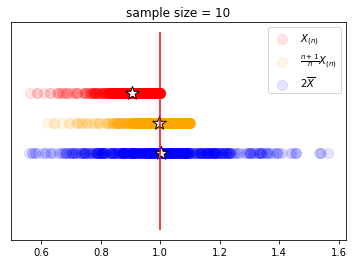

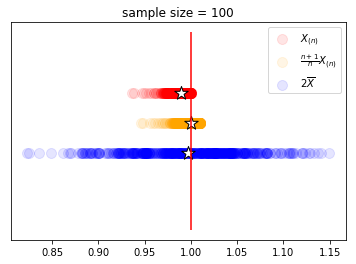

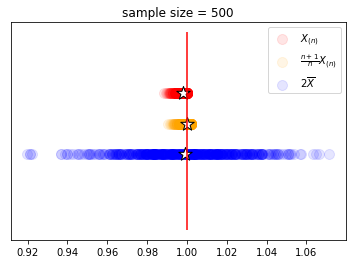

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline
number = [10, 100, 500]
for n in number:
    sample = sps.uniform.rvs(size=(500, n), loc=0, scale=1)
    evaluation = np.max(sample, axis = 1)
    level = 5
    plt.scatter(evaluation, np.zeros_like(evaluation) + level, 
                alpha=0.1, s=100, color='red', label='$X_{(n)}$')
    plt.scatter(evaluation.mean(), level, marker='*', s=200, 
                color='w', edgecolors='black')

    evaluation = np.max(sample, axis = 1) * (n + 1) / n
    level = 4
    plt.scatter(evaluation, np.zeros_like(evaluation) + level, 
                alpha=0.1, s=100, color='orange', label='$\\frac{n+1}{n}X_{(n)}$')
    plt.scatter(evaluation.mean(), level, marker='*', s=200, 
                color='w', edgecolors='black')

    evaluation = 2 * np.average(sample, axis = 1)
    level = 3
    plt.scatter(evaluation, np.zeros_like(evaluation) + level, 
                alpha=0.1, s=100, color='blue', label='$2\overline{X}$')
    plt.scatter(evaluation.mean(), level, marker='*', s=200, 
                color='w', edgecolors='black')

    plt.vlines(1, 7, np.average(sample, axis = 1), color='r')
    plt.title('sample size = %d' % n)
    plt.yticks([])
    plt.legend()
    plt.show()

Пусть теперь $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Известно, что в качестве оценки параметра $\sigma^2$ можно использовать следующие оценки $S^2, \frac{n}{n-1}S^2$.

**Вопрос:** Какие из этих оценок являются несмещенными?

**Ответ:** Из домашнего задания нам известно, что оценка $\frac{n}{n-1}S^2$ является несмещенной, а оценка $S^2$ - смещенной.

Для данной модели выполните те же действия, что и с предыдущей.

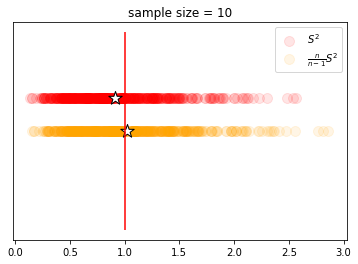

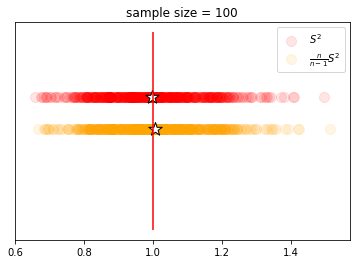

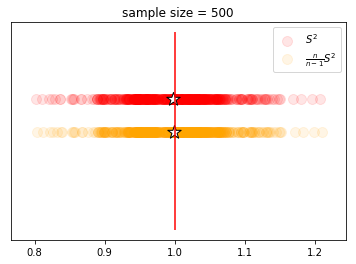

In [2]:
for n in number:
    sample = sps.norm.rvs(size=(500, n), loc=0, scale=1)
    avg = np.average(sample, axis = 1)
    evaluation = 1 / n * np.sum((sample - np.hsplit(avg, 500))**2, axis = 1)
    level = 4
    plt.scatter(evaluation, np.zeros_like(evaluation) + level, 
                alpha=0.1, s=100, color='red', label='$S^2$')
    plt.scatter(evaluation.mean(), level, marker='*', s=200, 
                color='w', edgecolors='black')
    
    evaluation = 1 / (n - 1) * np.sum((sample - np.hsplit(avg, 500))**2, axis = 1)
    level = 3
    plt.scatter(evaluation, np.zeros_like(evaluation) + level, 
                alpha=0.1, s=100, color='orange', label='$\\frac{n}{n-1}S^2$')
    plt.scatter(evaluation.mean(), level, marker='*', s=200, 
                color='w', edgecolors='black')
    
    plt.vlines(1, 6, np.average(sample, axis = 1), color='r')
    plt.title('sample size = %d' % n)
    plt.yticks([])
    plt.legend()
    plt.show()

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты свойство несмещенности данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** Несмещённость означает отсутствие ошибки "в среднем". Ибо, как нам известно, если оценка $\theta^*$ является несмещенной, то $E\theta^*=\theta$. Из усиленного закона больших чисел следует, что истинное значение параметра $\theta$ почти наверное равно всреднему значению оценок. Это подтверждают графики проделанных нами экспериментов.  Поэтому, в физике при вычислении погрешности(среднеквадратичного отклонения) используют n-1. Оно дает более близкое к истинному значение, чем S^2.

**Задача 2.** В этой задаче нужно визуализировать свойство состоятельности.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, 1)$. Известно, что $\overline{X}$ является состоятельной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра в зависимости от размера выборки.

Сгенерируйте 200 выборок $X_1^j, ..., X_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждой из них посчитайте оценки $\widehat{\theta}_{jn} = \frac{1}{n}\sum\limits_{i=1}^n X_i^j$ для $1 \leqslant n \leqslant 300$, то есть оценка параметра по первым $n$ наблюдениям $j$-й выборки. При написании кода может помочь вступительное задание.

Для каждого $j$ нанесите на один график зависимость $\widehat{\theta}_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.2`. Поскольку при малых $n$ значения оценок могут быть большими, ограничьте область графика по оси *y* с помощью функции `plt.ylim((min, max))`.


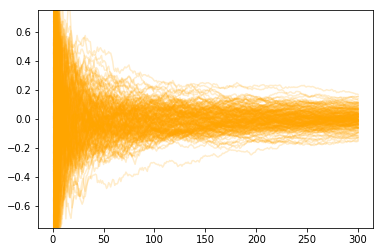

In [4]:
n = 300
sample = sps.norm.rvs(size=(200, n), loc=0, scale=1)
evaluation = np.vsplit(np.cumsum(sample, axis = 1), 200) / np.arange(1, n + 1)
plt.figure()
i = 0
while (i < 200):
    plt.plot(np.arange(1, n + 1), evaluation[i].ravel(), color='orange', alpha=0.2)
    i += 1
plt.ylim(-0.75, 0.75)
plt.show()

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Известно, что $X_{(n)}$ является состоятельной оценкой параметра $\theta$. Выполните исследование, аналогичное пункту *a)*, сгенерировав выборки из распределения $U[0, 1]$ и посчитав оценки $\widehat{\theta}_{jn} = \max\limits_{i=1...n}X_i^j$.

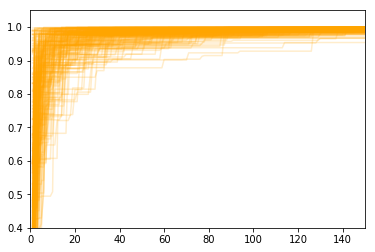

In [5]:
def get_evaluation(sample, n):
    evaluation = []
    j = 0
    for line in sample:
        i = 0
        cur_line = []
        while i < n:
            cur_line.append(np.max(sample[j][:i+1]))
            i += 1
        evaluation.append(cur_line)
        j += 1
    return evaluation


n = 300
sample = sps.uniform.rvs(size=(200, n), loc=0, scale=1)
evaluation = get_evaluation(sample, n)
plt.figure()
i = 0
while (i < 200):
    plt.plot(np.arange(1, n + 1), evaluation[i], color='orange', alpha=0.2)
    i += 1
plt.ylim(0.4, 1.05)
plt.xlim(-0.1, 150)
plt.show()

Сделайте вывод о том, что такое свойство состоятельности. Подтверждают ли сделанные эксперименты свойство состоятельности данных оценок? Как связаны результаты в пункте *a)* с законом больших чисел?

**Вывод:**
Свойство состоятельности означает, что последовательность оценок сходится по вероятности к неизвестному параметру. Из результатов, полученных нами в пункте а) видно, что большинство оценок стремится к $\theta=1$. И это же следует из закона больших чисел, что при достаточно больших $n$ и при любых $\theta$ верн, что $\theta_{jn}^*=\frac{1}{n}\sum_{i=1}^{n}X_{1}^{j}$ сходится почти наверное к $EX_{1}^{j}=\theta=1$. Полученные нами графики подтверждают истинность рассуждений.

**Задача 3.** В этой задаче нужно визуализировать свойство асимптотической нормальности.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, 1)$. Известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра в зависимости от размера выборки.

Сгенерируйте 200 выборок $X_1^j, ..., X_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждой из них посчитайте оценки $\widehat{\theta}_{jn} = \frac{1}{n}\sum\limits_{i=1}^n X_i^j$ для $1 \leqslant n \leqslant 300$, то есть оценка параметра по первым $n$ наблюдениям $j$-й выборки. Для этой оценки посчитайте статистику $T_{jn} = \sqrt{n} \left( \widehat{\theta}_{jn} - \theta \right)$, где $\theta = 0$.

Для каждого $j$ нанесите на один график зависимость $T_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.2`. Сходятся ли значения $T_{jn}$ к какой-либо константе?

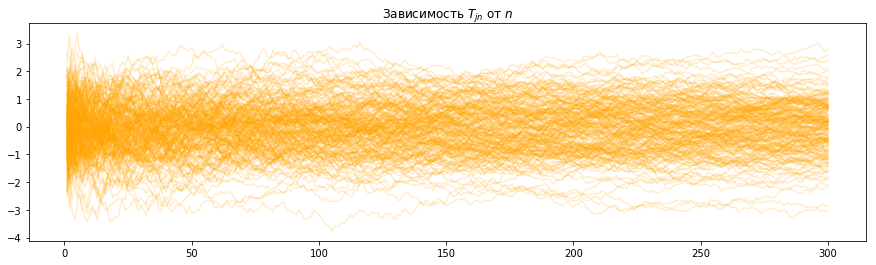

In [55]:
n = 300
sample = sps.norm.rvs(size=(200, n), loc=0, scale=1)
statistics = np.vsplit(np.cumsum(sample, axis = 1), 200) / np.sqrt(np.arange(1, n + 1))
plt.figure(figsize=(15, 4))
i = 0
while (i < 200):
    plt.plot(np.arange(1, n + 1), statistics[i].ravel(), color='orange', alpha=0.2)
    i += 1
plt.title('Зависимость $T_{jn}$ от $n$')
plt.show()

Для $n=300$ по выборке $T_{1,300}, ..., T_{200,300}$ постройте гистограмму и ядерную оценку плотности. Хорошо ли они приближают плотность распределения $\mathcal{N}(0, 1)$ (ее тоже постройте на том же графике)? Не забудьте сделать легенду.

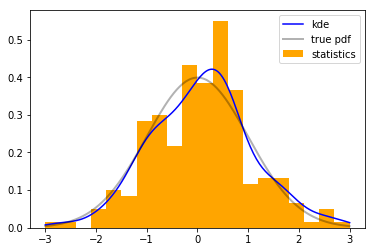

In [40]:
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.nonparametric.kde import KDEUnivariate


plt.figure()
grid = np.linspace(-3, 3, 200)
plt.hist((statistics.T)[-1].ravel(), bins=20,
        range=(grid.min(), grid.max()), color='orange',
        normed=True, label='statistics')
kernel_density = KDEUnivariate((statistics.T)[-1].ravel())
kernel_density.fit()
plt.plot(grid, kernel_density.evaluate(grid), color='blue', label='kde')
pdf = sps.norm(loc=0, scale=1).pdf
plt.plot(grid, pdf(grid), color='black', alpha=0.3, lw=2, label='true pdf')
plt.legend()
plt.show()

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Pois(\theta)$. Известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$. Выполните исследование, аналогичное пункту *a)*.

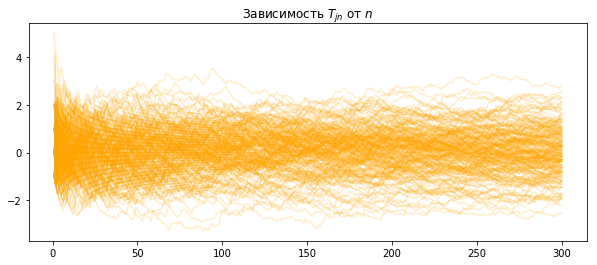

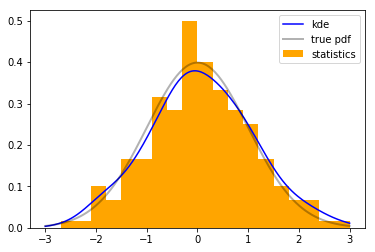

In [58]:
n = 300
sample = sps.poisson.rvs(mu=1, loc=0, size=(200, n))
evaluations = np.vsplit(np.cumsum(sample, axis = 1), 200) / np.arange(1, n + 1)
statistics = (evaluations - 1) * np.sqrt(np.arange(1, n + 1))
plt.figure(figsize=(10, 4))
i = 0
while (i < 200):
    plt.plot(np.arange(1, n + 1), statistics[i].ravel(), color='orange', alpha=0.2)
    i += 1
plt.title('Зависимость $T_{jn}$ от $n$')
plt.show()

plt.figure()
grid = np.linspace(-3, 3, 200)
plt.hist((statistics.T)[-1].ravel(), bins=20,
        range=(grid.min(), grid.max()), color='orange',
        normed=True, label='statistics')
kernel_density = KDEUnivariate((statistics.T)[-1].ravel())
kernel_density.fit()
plt.plot(grid, kernel_density.evaluate(grid), color='blue', label='kde')
pdf = sps.norm(loc=0, scale=1).pdf
plt.plot(grid, pdf(grid), color='black', alpha=0.3, lw=2, label='true pdf')
plt.legend()
plt.show()

Сделайте вывод о том, что такое свойство асимптотической нормальности. Подтверждают ли сделанные эксперименты свойство асимптотической нормальности данных оценок? Как связаны результаты с центральной предельной теоремой?

**Вывод:** Асимптотическая нормальность означает, что для оценки $\theta^*$ параметра $\theta$ с коэффициентом $\sigma^2(\theta)$ выполняется сходимость по распределению $\sqrt n (\theta^*-\theta)$ к $N_{0, \sigma^2(\theta)}$. Этот же вывод мы получаем и из центральной предельной теоремы. Истинность рассуждений наглядно показывают полученные нами графики.

**Задача 4.** Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Из домашнего задания известно, что $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$. Проведите исследование, аналогичное заданию 3 для $\theta=1$.

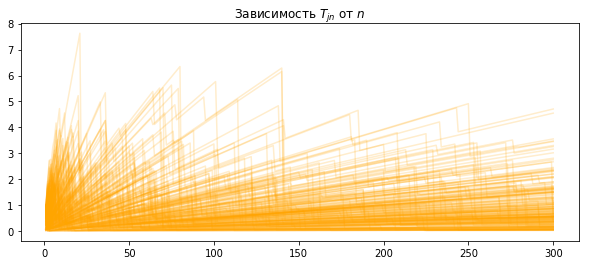

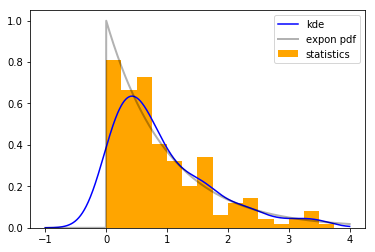

In [73]:
def get_evaluations(sample, n):
    evaluation = []
    j = 0
    for line in sample:
        i = 0
        cur_line = []
        while i < n:
            cur_line.append(np.max(sample[j][:i+1]))
            i += 1
        evaluation.append(cur_line)
        j += 1
    return evaluation


n = 300
sample = sps.uniform.rvs(size=(200, n), loc=0, scale=1)
evaluations = np.array(get_evaluations(sample, n))
statistics = np.arange(1, n + 1) * (1 - evaluations)
plt.figure(figsize=(10,4))
i = 0
while (i < 200):
    plt.plot(np.linspace(1, 300, 300), statistics[i], color='orange', alpha=0.2)
    i += 1
plt.title('Зависимость $T_{jn}$ от $n$')
plt.show()

plt.figure()
grid = np.linspace(-1, 4, 1000)
plt.hist((statistics.T)[-1], bins=20,
        range=(grid.min(), grid.max()), color='orange',
        normed=True, label='statistics')
kernel_density = KDEUnivariate((statistics.T)[-1].ravel())
kernel_density.fit()
plt.plot(grid, kernel_density.evaluate(grid), color='blue', label='kde')
pdf = sps.expon(loc=0, scale=1).pdf
plt.plot(grid, pdf(grid), color='black', alpha=0.3, lw=2, label='expon pdf')
plt.legend()
plt.show()

**Вывод:** С помощью построенных графиков, мы убедились, что $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$.

**Задача 5.** Дана параметрическая модель и несколько выборок из двух или трех наблюдений (для удобства они даются в виде python-кода). Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: [-1, 1], [-5, 5], [-1, 5]

*b).* Параметрическая модель $Exp(\theta)$, выборки: [1, 2], [0.1, 1], [1, 10]

*c).* Параметрическая модель $U[0, \theta]$, выборки: [0.2, 0.8], [0.5, 1], [0.5, 1.3]

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: [0, 1], [5, 5], [0, 5]

*e).* Параметрическая модель $Pois(\theta)$, выборки: [0, 1], [0, 10], [5, 10]

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ --- параметр сдвига, выборки: [-0.5, 0.5], [-2, 2], [-4, 0, 4]

Выполнить задание, не создавая много кода, поможет следующая функция.

In [88]:
def draw_likelihood(density_function, grid, samples, label):
    ''' density_function --- функция, считающая плотность (обычную или дискретную)
        grid --- сетка для построения графика
        samples --- три выборки
        label --- latex-код параметрической модели
    '''
    
    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = []
        for line in sample:
            likelihood.append(density_function(line[0]) * density_function(line[1]))
        
        likelihood = np.array(likelihood).ravel().T
        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода

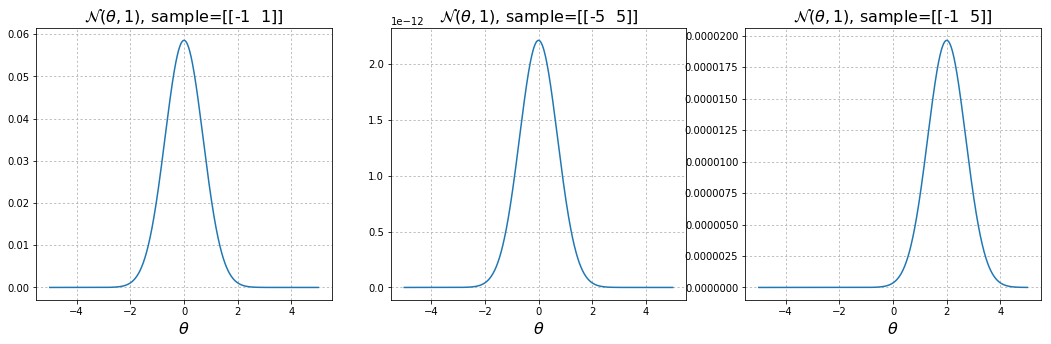

In [89]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

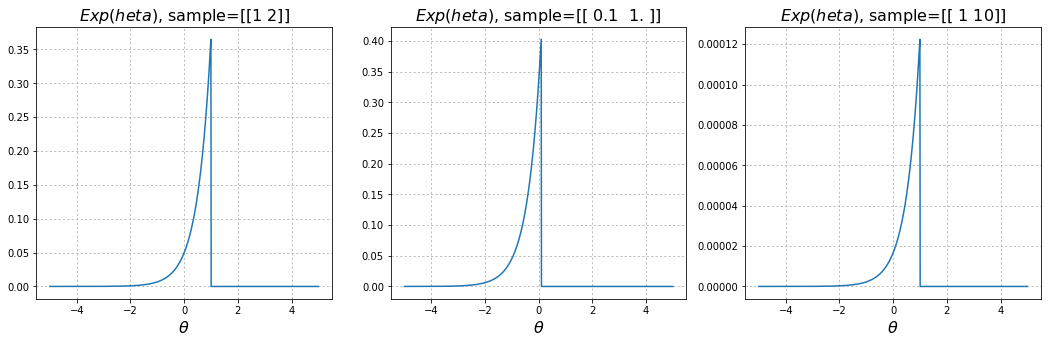

In [90]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.expon(loc=grid).pdf, grid, 
                [[1, 2], [0.1, 1], [1, 10]], '$Exp(\theta)$')

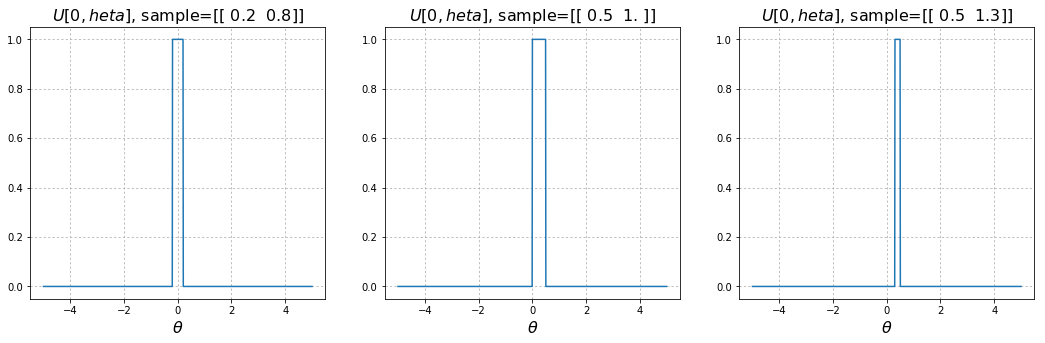

In [114]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.uniform(grid).pdf, grid, 
                [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$U[0, \theta]$')

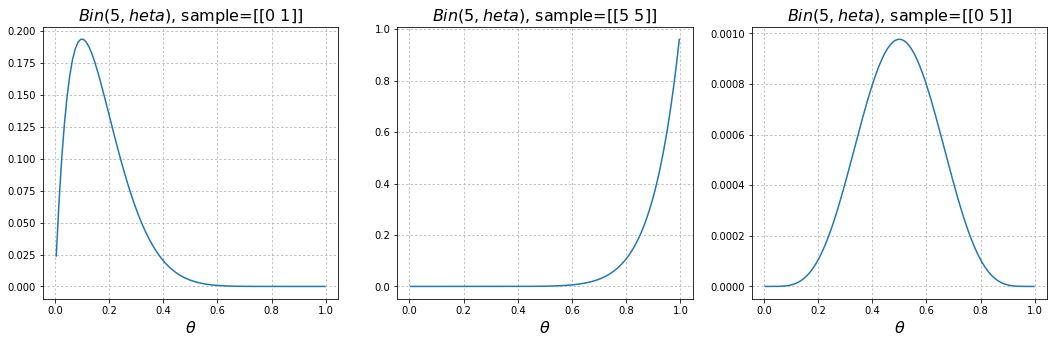

In [113]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.binom(5,grid).pmf, grid, 
                [[0, 1], [5, 5], [0, 5]], '$Bin(5, \theta)$')

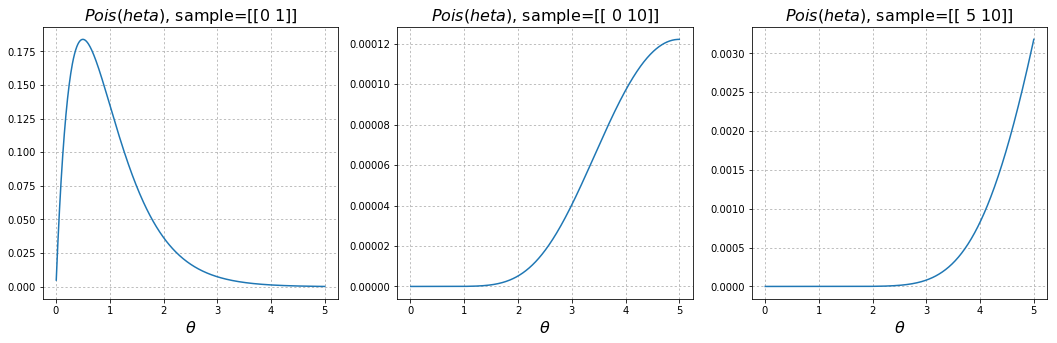

In [115]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.poisson(grid).pmf, grid, 
                [[0, 1], [0, 10], [5, 10]], '$Pois(\theta)$')

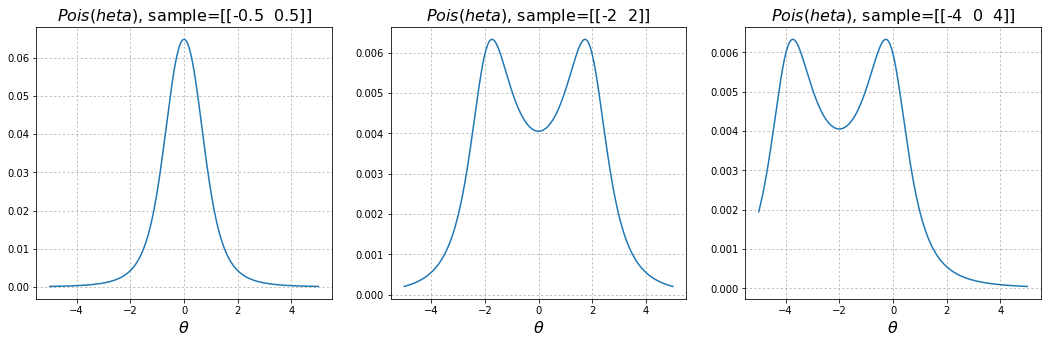

In [117]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.cauchy(grid).pdf, grid, 
                [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], '$Pois(\theta)$')

Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:** Выборка является последовательностью независимых случайных величин. Следовательно, функция правдоподобия является произведением плотнойстей независимых случайных величин. Следовательно, она является плотностью совместного распределения.

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже

In [118]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Мы пытаемся перемножить очень большое количество чисел, стремящихся к нулю. Поэтому при округлении, в произведении получается ноль. Чтобы этого избежать, возьмем сумму по логарифмам этих чисел.

In [203]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.logpdf(sample).sum()
print(likelihood)

-142094.088596


**Задача 6.** 
На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Регистрируются координаты $X_i, i=1,...,n$ точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости.
Известно, что $X_i$ имеет распределение Коши.

*a).* На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

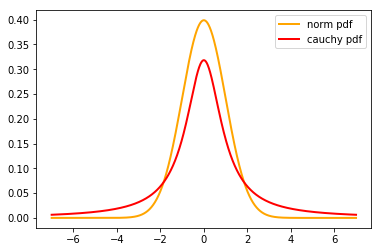

In [123]:
plt.figure()
grid = np.linspace(-7, 7, 1000)
plt.plot(grid, sps.norm(loc=0, scale=1).pdf(grid), color='orange', lw=2, label='norm pdf')
plt.plot(grid, sps.cauchy.pdf(grid), color='red', lw=2, label='cauchy pdf')
plt.legend()
plt.show()

*b).* Сгенерируйте выборку размера 100 из стандартного распределения Коши. Для всех $n \leqslant 100$ по первым $n$ элементам выборки посчитайте значения $\overline{X}$ и $\widehat{\mu}$ (выборочное среднее и выборочная медиана). На одном графике изобразите зависимость значений этих оценок от $n$. Сделайте вывод.

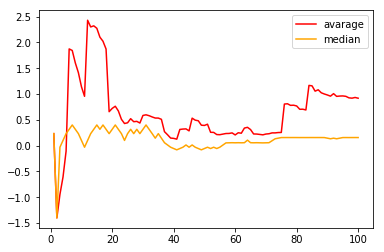

In [210]:
sample = sps.cauchy.rvs(size=100)
avarage = np.cumsum(sample) / np.arange(1, 101)
medians = []
i = 0
while i < 100:
    medians.append(np.median(sample[:i+1]))
    i += 1
medians = np.array(medians)
plt.figure()
plt.plot(np.arange(1, 101), avarage, color='red', label='avarage')
plt.plot(np.arange(1, 101), medians, color='orange', label='median')
plt.legend()
plt.show()

**Вывод:** По построенным графикам мы видим, что значения выборочной медианы и выборочного среднего довольно близки друг к другу. Но выборочная медиана дает оценку на $x_{0}$ в распределении, в отличии от выборочного среднего.

**Задача 7.** На сегодняшний день возобновляемые источники энергии становятся все более востребованными. К таким источникам относятся, например, ветрогенераторы. Однако, их мощность очень трудно прогнозировать. В частности, выработка энергии при помощи ветрогенераторы сильно зависит от скорости ветра. Поэтому предсказание скорости ветра является очень важной задачей. Скорость ветра часто моделируют с помощью распределения Вейбулла, которое имеет плотность
$$p_\theta(x) = \frac{kx^{k-1}}{\lambda^k} e^{-(x/\lambda)^k},$$
где $\theta = (k, \lambda)$ --- двумерный параметр. К сожалению, найти точную оценку максимального правдоподобия на $\theta$ не получится. В данном задании нужно найти оценку максимального правдоподобия приближенно с помощью поиска по сетке.

*Выборка.* Создайте выборку по значению скорости ветра для некоторой местности для не менее чем 100 дней. Помочь в этом может <a href="https://www.gismeteo.ru/diary/">дневник погоды</a>. Однако, данные там округлены до целого, поэтому вы можете попробовать найти другие данные.

*a).* Найдите оценку максимального правдоподобия параметра $\theta = (k, \lambda)$ с точностью $10^{-5}$ при помощи поиска по двумерной сетке.

За распределение Вейбулла отвечает класс `weibull_min` из `scipy.stats`, которое задается так: `weibull_min(c=`$k$ `, scale=`$\lambda$ `)`.

Двумерную сетку можно создать с помощью `numpy.mgrid[from:to:step, from:to:step]`. Если попробовать сразу создать сетку с шагом $10^{-5},$ то может не хватить памяти. Поэтому найдите сначала максимум по сетке с большим шагом, а потом сделайте сетку с маленьким шагом в окрестности найденной точки. При вычислении без циклов, возможно, придется создавать четырехмерные объекты.

Функция `numpy.argmax` выдает не очень информативный индекс, поэтому пользуйтесь следующей функцией.

In [ ]:
def cool_argmax(array):
    return np.unravel_index(np.argmax(array), array.shape)

Нарисуйте график плотности с параметрами, соответствующим найденным ОМП, а так же нанесите на график гистограмму.

In [ ]:
...

*b).*<font size="5" color="red">\*</font> На самом деле, при помощи дифференцирования можно перейти к задаче поиска ОМП для параметра $k$. Выполните такое преобразование и найдите ОМП приближенно с помощью метода Ньютона, основываясь на параграфе 35 книги А.А. Боровкова "Математическая статистика", 2007.

**Задача 8.** 

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим оценки $2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом 0.01 сгенерируйте 2000 выборок $X_1^j, ..., X_{100}^j$ из распределения $U[0, \theta]$. По каждой из этих выборок посчитайте значение всех четырех оценок. Тем самым для данного $\theta$ и оценки $\theta^*$ получится 2000 реализаций этой оценки $\theta^*_1, ..., \theta^*_{2000}$, где значение $\theta^*_j$ посчитано по реализации выборки $X_1^j, ..., X_{100}^j$. Теперь можно оценить функцию потерь этой оценки с помощью усреднения
$$\widehat{R}\left(\theta^*, \theta\right) = \frac{1}{2000}\sum\limits_{j=1}^{2000} g\left(\theta^*_j, \theta\right),$$
где $g(x, y)=(x-y)^2$ и $g(x, y)=\left|x-y\right|$.

Нанесите на один график все четыре функции риска. Для каждого типа функции потерь должен быть свой график. Пользуйтесь следующим шаблоном. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

In [162]:
q = 0.0
risk1 = [[], []]
risk2 = [[], []]
risk3 = [[], []]
risk4 = [[], []]
while q < 2:
    sample = sps.uniform.rvs(loc=0, scale=q, size=(2000, 100))
    evaluation = 2 * np.average(sample, axis=1)
    risk1[0].append(1/2000 * np.sum((evaluation - q)**2))
    risk1[1].append(1/2000 * np.sum(np.absolute(evaluation - q)))
    evaluation = 101 * np.min(sample, axis=1)
    risk2[0].append(1/2000 * np.sum((evaluation - q)**2))
    risk2[1].append(1/2000 * np.sum(np.absolute(evaluation - q)))
    evaluation = np.max(sample, axis=1) + np.min(sample, axis=1)
    risk3[0].append(1/2000 * np.sum((evaluation - q)**2))
    risk3[1].append(1/2000 * np.sum(np.absolute(evaluation - q)))
    evaluation = 101/100 * np.max(sample, axis=1)
    risk4[0].append(1/2000 * np.sum((evaluation - q)**2))
    risk4[1].append(1/2000 * np.sum(np.absolute(evaluation - q)))
    q += 0.01

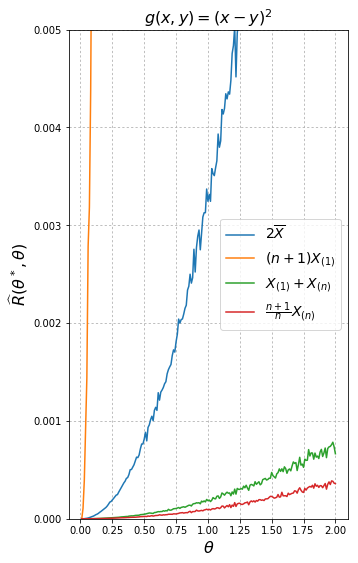

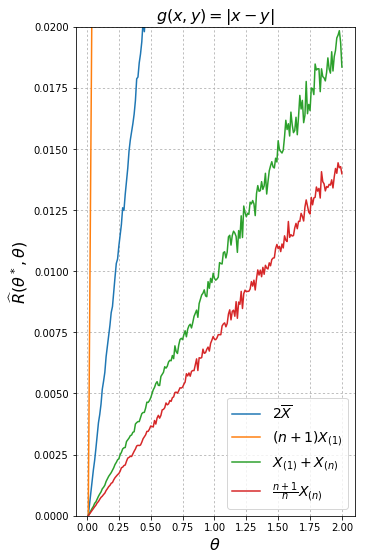

In [202]:
plt.figure(figsize=(5,9))
plt.plot(np.arange(0.01, 2.01, 0.01),  risk1[0], label='$2\\overline{X}$')
plt.plot(np.arange(0.01, 2.01, 0.01),  risk2[0], label='$(n+1)X_{(1)}$')
plt.plot(np.arange(0.01, 2.01, 0.01),  risk3[0], label='$X_{(1)}+X_{(n)}$')
plt.plot(np.arange(0.01, 2.01, 0.01),  risk4[0], label='$\\frac{n+1}{n} X_{(n)}$')
plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
plt.legend(fontsize=14)
plt.title('$g(x, y)=(x-y)^2$', fontsize=16)
plt.ylim((0, 0.005))
plt.show()

plt.figure(figsize=(5,9))
plt.plot(np.arange(0.01, 2.01, 0.01),  risk1[1], label='$2\\overline{X}$')
plt.plot(np.arange(0.01, 2.01, 0.01),  risk2[1], label='$(n+1)X_{(1)}$')
plt.plot(np.arange(0.01, 2.01, 0.01),  risk3[1], label='$X_{(1)}+X_{(n)}$')
plt.plot(np.arange(0.01, 2.01, 0.01),  risk4[1], label='$\\frac{n+1}{n} X_{(n)}$')
plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
plt.legend(fontsize=14)
plt.title('$g(x, y)=\\left|x-y\\right|$', fontsize=16)
plt.ylim((0, 0.02))
plt.show()


Сделайте вывод о том, какая оценка лучше и в каком подходе.

**Вывод:**  По графикам мы видим, что квадратичный подход дает более хорошие результаты, чем линейный. В обоих подходах наилучший результат дает оценка $\frac{n+1}{n} X_{(n)}$.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Exp(\theta)$. Для $1 \leqslant k \leqslant 5$ рассмотрим оценки $\left(k! / \overline{X^k}\right)^{1/k}$, которые вы получили в домашнем задании. Проведите исследование, аналогичное пункту *a)*. Используйте цикл по $k$, чтобы не размножать код. Факториалы есть гамма-функция, которая реализована в `scipy.special.gamma`.

**Задача 9<font size="5" color="red">\*</font>.** Пусть $\theta^*$ --- оценка параметра $\theta$ и $R\left(\theta^*, \theta\right) = \mathsf{E}_{\theta} \left(\theta^* - \theta\right)^2$ --- функция риска с квадратичной функцией потерь. Тогда справедливо bias-variance разложение
$$R\left(\theta^*, \theta\right) = bias^2(\theta^*, \theta) + variance(\theta^*, \theta) ,$$
$$bias(\theta^*, \theta) = \mathsf{E}_{\theta} \theta^* - \theta,$$
$$variance(\theta^*, \theta) = \mathsf{D}_{\theta} \theta^*.$$

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathscr{K} = \left\{cX_{(n)}, c\in\mathbb{R}\right\}$. Выпишите bias-variance разложение для таких оценок.

...

Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отобажена информативная часть графика (по оси *x* примерно от 0.9 до 1.3). Не забудьте добавить сетку и легенду, а так же подписать оси.

Сделайте выводы. Какая $c$ дает минимум функции риска? Является ли соответствующая оценка смещеной? Что можно сказать про несмещенную оценку?

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Рассмотрим класс оценок $\mathscr{K} = \left\{\frac{1}{c}\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2, c\in\mathbb{R}\right\}$. Выпишите bias-variance разложение для таких оценок. Можно использовать то, что величина $\frac{nS^2}{\sigma^2}$ имеет распределение хи-квадрат с $n-1$ степенью свободы (это будет доказано в нашем курсе позже) и ее дисперсия равна $2(n-1)$.

...

Повторите исследование, аналогичное пункту *a)* для $sigma^2 = 1$ и $n \in \{5, 10\}$. Для экономии места нарисуйте два графика в строчку. Не забудьте сделать выводы.

**Задача 10<font size="5" color="red">\*</font>.** Разберитесь с теорией параграфа 4 главы 6 книжки М.Б. Лагутина "Наглядная математическая статистика", 2009. Проведите соответствующее исследование.